<a href="https://colab.research.google.com/github/SiracencoSerghei/DataScienceHW/blob/main/example_kaggle/les_9/les_keras_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[10]])
print(decoded_review)

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
? french horror cinema has seen something of a revival over the last couple of years with great films such as inside and ? romance ? on to the scene ? ? the revival just slightly but stands head and shoulders over most modern horror titles and is surely one of the best french horror films ever made ? was obviously shot on a low budget but this is made up for in far more ways than one by the originality of the film and this in turn is ? by the excellent writing and acting that ensure the film is a winner the plot focuses on two main ideas prison and black magic the central character is a man named ? sent to prison for fraud he is put in a cell with three others the quietly insane ? body building ? marcus and his retarded boyfriend daisy after a short while in the cell together they stumble upon a hiding place in the wall that contains an old ? after ? part of it they soon realise its magical powers and realise they may be able to use it t

In [5]:
print(train_data.shape)
print(type(train_data[0]))
print(len(train_data[0]))

(25000,)
<class 'list'>
218


In [8]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

x_train = vectorize_sequences(train_data)
y_train = np.asarray(train_labels).astype('float32')

x_test = vectorize_sequences(test_data)
y_test = np.asarray(test_labels).astype('float32')

In [9]:
print(x_train.shape)

(25000, 10000)


In [11]:
# from keras.models import Sequential
# from keras.layers import Dense


# # model = Sequential([
# #     Dense(16, activation='relu', input_shape=(10000,)),
# #     Dense(16, activation='relu'),
# #     Dense(1, activation='sigmoid'),
# # ])


# model = Sequential()
# model.add(Dense(16, activation='relu', input_shape=(10000,)))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))


In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras import losses
from keras import metrics


model = Sequential([
    Dense(16, activation='relu', input_shape=(10000,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid'),
])

# встановлення останніх необхідних параметрів:

# model.compile(
#     # optimizer=optimizers.rmsprop_v2.RMSprop(lr=0.001),  # У нових версіях Keras lr замінили на learning_rate.
#     optimizer=optimizers.RMSprop(learning_rate=0.001),
#     loss=losses.binary_crossentropy,
#     # metrics=[metrics.accuracy]  # У нових версіях Keras замінили на  metrics=['accuracy'].
#     metrics=['accuracy']
# )

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [19]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 16)                  │         160,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.6977 - loss: 0.5961 - val_accuracy: 0.8713 - val_loss: 0.3802
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8878 - loss: 0.3356 - val_accuracy: 0.8865 - val_loss: 0.3065
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.9238 - loss: 0.2382 - val_accuracy: 0.8907 - val_loss: 0.2802
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9375 - loss: 0.1928 - val_accuracy: 0.8883 - val_loss: 0.2801
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9499 - loss: 0.1581 - val_accuracy: 0.8772 - val_loss: 0.3044
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9574 - loss: 0.1327 - val_accuracy: 0.8851 - val_loss: 0.2879
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9674 - loss: 0.1135 - val_accuracy: 0.8803 - val_loss: 0.3224
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9714 - loss: 0.0996 - val_accuracy: 0.8834 - 

In [21]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


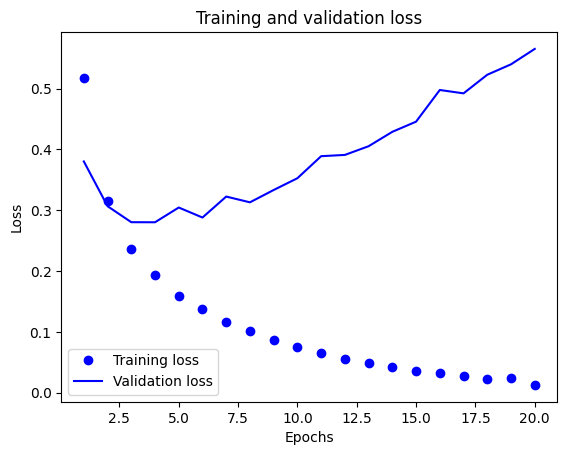

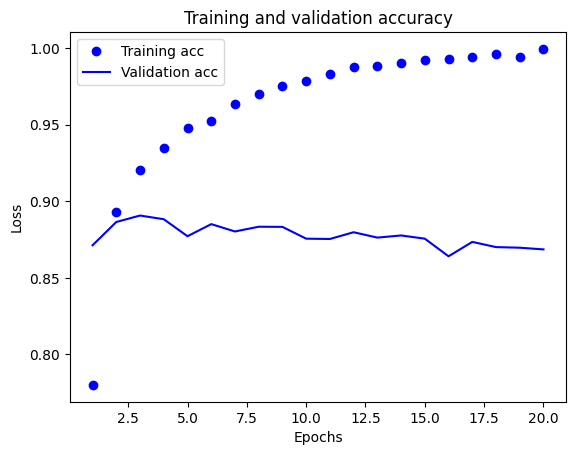

In [24]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


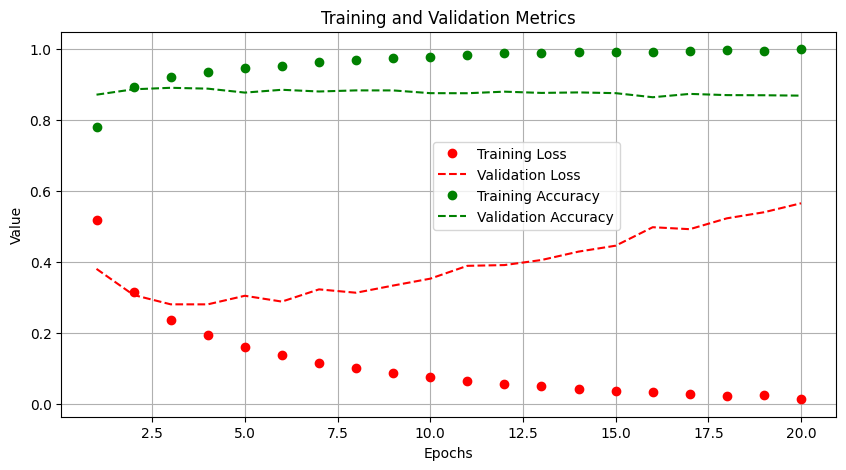

In [32]:
history_dict = history.history
epochs = range(1, len(history_dict['accuracy']) + 1)

# Створюємо графік втрат та точності на одному полотні
plt.figure(figsize=(10, 5))

# Втрати
plt.plot(epochs, history_dict['loss'], 'ro', label='Training Loss')  # Червоний колір
plt.plot(epochs, history_dict['val_loss'], 'r--', label='Validation Loss')  # Червона пунктирна

# Точність
plt.plot(epochs, history_dict['accuracy'], 'go', label='Training Accuracy')  # Зелений колір
plt.plot(epochs, history_dict['val_accuracy'], 'g--', label='Validation Accuracy')  # Зелена пунктирна

plt.title('Training and Validation Metrics')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend(loc="center", bbox_to_anchor=(0.6, 0.6))
plt.grid(True)

plt.show()


In [35]:
results = model.evaluate(x_test, y_test)
print(results)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8539 - loss: 0.6305


[0.6168688535690308, 0.8557999730110168]

In [37]:
from keras import layers

model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6723 - loss: 0.5914
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9018 - loss: 0.2993
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9224 - loss: 0.2286
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9361 - loss: 0.1864
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8840 - loss: 0.2853
[0.2833836078643799, 0.8872799873352051]


In [38]:
results = model.evaluate(x_test, y_test)
print(results)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8840 - loss: 0.2853
[0.2833836078643799, 0.8872799873352051]


In [39]:
result = model.predict(x_test[0, :].reshape(1, 10000))
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
[[0.20977274]]


In [41]:
# model.save("my_model")
model.save("my_model.keras")


In [46]:
model = keras.models.load_model("my_model.keras")